# Data Collection

## SQL 

* census_bureau_usa
* iowa_liquor_sales


In [ ]:
"""
SELECT APPROX_QUANTILES(VARIACAO, 4) QUANTIS

FROM
(SELECT *,
      SAFE_DIVIDE(POPULATION_2010 - POPULATION_2000, POPULATION_2000) as VARIACAO,
FROM

(SELECT a.zipcode, 
       a.gender, 
       sum(a.population) as POPULATION_2000,
       sum(b.population) as POPULATION_2010

FROM `bigquery-public-data.census_bureau_usa.population_by_zip_2000` a
INNER JOIN `bigquery-public-data.census_bureau_usa.population_by_zip_2010` b on a.zipcode = b.zipcode AND a.gender = b.gender
group by zipcode, gender)

ORDER BY VARIACAO DESC)
"""

In [ ]:
"""
AVG(TPV) OVER (PARTITION BY ClientAlternateKey ORDER BY TransactionMonth ASC ROWS BETWEEN 6 PRECEDING AND CURRENT ROW) AS TPV_ROLLING_6_MONTH,



"""


## Lendo DataFrames diretamente da Web


In [ ]:
import pandas as pd 
import numpy as np 
import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### CSVs

In [ ]:
population = pd.read_csv("https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_TotalPopulationBySex.csv", sep = ",")

In [ ]:
population.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752.117,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840.151,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935.996,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039.684,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151.316,12.486


### JSON

In [ ]:
bcb_series = {
    'ipca' : 433,
    'igpm' : 189,
    'selic' : 11,
    'meta_selic' : 432,
    'cdi' : 12,
    'pnad' : 24369,
    'cambio' : 1,
    'pib' : 4380
}

def get_data_bcb(series, start, end):
    now = datetime.datetime.now()
    if start is None:
        start = now

    if end is None:
        end = now

    if isinstance(start, str):
        start = datetime.datetime.strptime(start, "%Y-%m-%d")

    if isinstance(end, str):
        end = datetime.datetime.strptime(end, "%Y-%m-%d")

    if start > end:
        raise Exception("Start datetime is greater than end")

    dataInicial = start.strftime("%d/%m/%Y")
    dataFinal = end.strftime("%d/%m/%Y")

    if series.lower() in bcb_series.keys():
        codigo_serie = bcb_series[series.lower()]
    else:
        raise Exception("Series not found")

    url = f"http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_serie}/dados?formato=json&dataInicial={dataInicial}&dataFinal={dataFinal}"

    df = pd.DataFrame([])
    try:
        df = pd.read_json(url)
    except:
        print("Could not load data from bcb. Query string:", url)

    return df
    

In [ ]:
ipca = get_data_bcb('ipca', "2010-01-01", "2022-01-01")

In [ ]:
ipca.head()

,data,valor
0,2010-01-01,0.75
1,2010-02-01,0.78
2,2010-03-01,0.52
3,2010-04-01,0.57
4,2010-05-01,0.43


In [ ]:
ipca['data'] = pd.to_datetime(ipca['data'], format = "%d/%m/%Y")

In [ ]:
ipca['ipca_ac'] = ipca['valor'].rolling(12).sum()

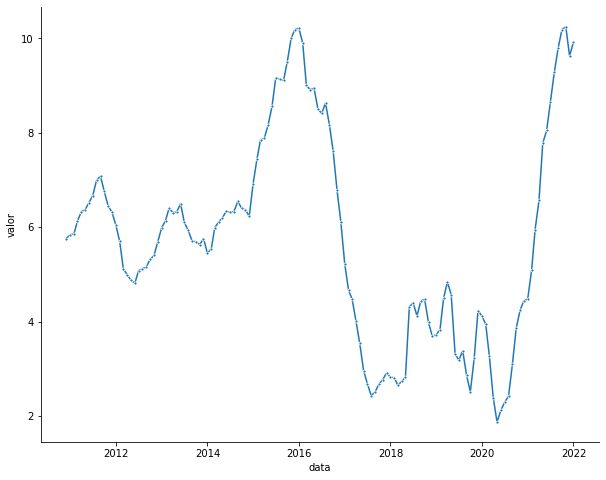

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
sns.lineplot(ipca['data'], ipca['valor'].rolling(12).sum(), data = ipca, ax = ax, marker = '.')
sns.despine()

## Chamando APIs

### Google News

In [ ]:
!pip install gnews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 5.9 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 508 kB 50.7 MB/s 
     |████████████████████████████████| 115 kB 54.4 MB/s 
     |████████████████████████████████| 188 kB 45.8 MB/s 
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=c908b32fc1ffb10a57ed2fabe7967d58cd390ada29f8f13991a8b7ecd56ea7ff
  Stored in directory: /root/.cache/pip/wheels/73/ad/a4/0dff4a6ef231fc0dfa12ffbac2a36cebfdddfe059f50e019aa
Successfully built sgmllib3k
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully unins

In [ ]:
from gnews import GNews

In [ ]:
gnews = GNews(language = "PT", country = "BR", period = "7d")
news = gnews.get_news("Inflação")

In [ ]:
pd.DataFrame(news)

,title,description,published date,url,publisher
0,"IGP-10 registra inflação de 0,74% em junho, di...","IGP-10 registra inflação de 0,74% em junho, di...","Wed, 15 Jun 2022 11:30:00 GMT",https://agenciabrasil.ebc.com.br/economia/noti...,"{'href': 'https://agenciabrasil.ebc.com.br', '..."
1,"IPCA: inflação fica em 0,47% em maio e desacel...","IPCA: inflação fica em 0,47% em maio e desacel...","Thu, 09 Jun 2022 12:00:19 GMT",https://g1.globo.com/economia/noticia/2022/06/...,"{'href': 'https://g1.globo.com', 'title': 'Glo..."
2,"Para combater inflação, Fed acelera e sobe jur...","Para combater inflação, Fed acelera e sobe jur...","Wed, 15 Jun 2022 18:01:00 GMT",https://trademap.com.br/agencia/internacional/...,"{'href': 'https://trademap.com.br', 'title': '..."
3,Maioria dos brasileiros sente que inflação sub...,Maioria dos brasileiros sente que inflação sub...,"Wed, 15 Jun 2022 14:04:00 GMT",https://amanha.com.br/categoria/economia/maior...,"{'href': 'https://amanha.com.br', 'title': 'Gr..."
4,O que é a inflação? Economista explica porque ...,O que é a inflação? Economista explica porque ...,"Tue, 14 Jun 2022 22:00:06 GMT",https://fdr.com.br/2022/06/14/o-que-e-a-inflac...,"{'href': 'https://fdr.com.br', 'title': 'FDR -..."
...,...,...,...,...,...
83,Juros operam em alta com sinais de inflação pe...,Juros operam em alta com sinais de inflação pe...,"Fri, 10 Jun 2022 12:39:00 GMT",https://monitordomercado.com.br/content/31329,"{'href': 'https://monitordomercado.com.br', 't..."
84,Os Bancos Centrais Realmente Têm Poder Sobre a...,Os Bancos Centrais Realmente Têm Poder Sobre a...,"Sun, 12 Jun 2022 13:19:00 GMT",https://br.investing.com/analysis/os-bancos-ce...,"{'href': 'https://br.investing.com', 'title': ..."
85,"Inflação para os produtores no Japão sobe 9,1%...","Inflação para os produtores no Japão sobe 9,1%...","Fri, 10 Jun 2022 09:59:00 GMT",https://monitordomercado.com.br/content/31309,"{'href': 'https://monitordomercado.com.br', 't..."
86,Snoop Dogg deu aumento a bolador de maconha pe...,Snoop Dogg deu aumento a bolador de maconha pe...,"Thu, 09 Jun 2022 16:58:00 GMT",https://www.correiobraziliense.com.br/diversao...,{'href': 'https://www.correiobraziliense.com.b...


### Yahoo Finance

In [ ]:
!pip install yahooquery

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 4.1 MB/s 
     |████████████████████████████████| 6.4 MB 25.7 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
from yahooquery import Ticker

In [ ]:
ticker = Ticker("AAPL") 
data = ticker.history(start = "2020-01-01", end = "2022-01-01", interval = '1d')

In [ ]:
data = data.reset_index()

In [ ]:
data.head()

,symbol,date,low,open,close,high,volume,adjclose,dividends,splits
0,AAPL,2020-01-02,73.797501,74.059998,75.087502,75.150002,135480400,73.785912,0.0,0.0
1,AAPL,2020-01-03,74.125000,74.287498,74.357498,75.144997,146322800,73.068565,0.0,0.0
2,AAPL,2020-01-06,73.187500,73.447502,74.949997,74.989998,118387200,73.650803,0.0,0.0
3,AAPL,2020-01-07,74.370003,74.959999,74.597504,75.224998,108872000,73.304413,0.0,0.0
4,AAPL,2020-01-08,74.290001,74.290001,75.797501,76.110001,132079200,74.483620,0.0,0.0


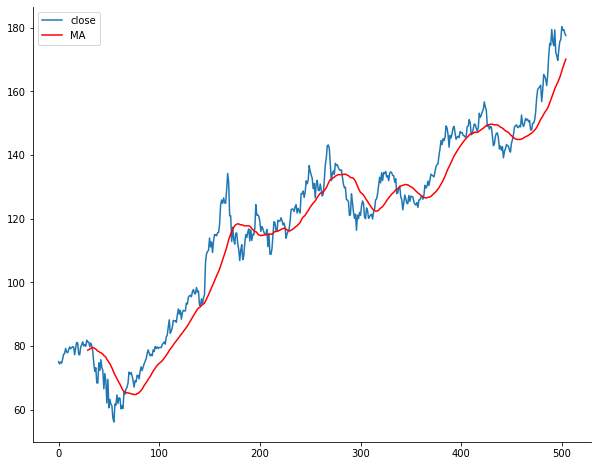

In [ ]:
fig, ax = plt.subplots(figsize = (10, 8))
ax.plot(data['close'], label = 'close')
ax.plot(data['close'].rolling(30).mean(), color = 'red', label = 'MA')
plt.legend()
sns.despine()

### COVID

Documentação: https://documenter.getpostman.com/view/10808728/SzS8rjbc#00030720-fae3-4c72-8aea-ad01ba17adf8

In [ ]:
population.query('Time == 2020 & Variant == "Medium"', inplace = True)
population.rename(columns = {'Location' : "Country"}, inplace = True)

In [ ]:
countries_url = "https://api.covid19api.com/countries"

response = requests.request("GET", countries_url)
data = response.json()
countries = pd.DataFrame(data)

url = "https://api.covid19api.com/dayone/country/south-africa/status/confirmed"



In [ ]:
countries = pd.merge(left = countries, right = population, on = 'Country')

In [ ]:
biggest_countries = countries.sort_values(by = 'PopTotal', ascending = False).head(20)['Slug'].values

In [ ]:
biggest_countries

array(['china', 'india', 'united-states', 'indonesia', 'pakistan',
       'brazil', 'nigeria', 'bangladesh', 'russia', 'mexico', 'japan',
       'ethiopia', 'philippines', 'egypt', 'vietnam', 'turkey', 'germany',
       'thailand', 'united-kingdom', 'france'], dtype=object)

In [ ]:
from tqdm import tqdm
import time

In [ ]:
dfs = []
for country in tqdm(biggest_countries):
  confirmed_url = f"https://api.covid19api.com/dayone/country/{country}/status/confirmed/live"
  response = requests.request("GET", confirmed_url)
  data = response.json()
  try:
    dfs.append(pd.DataFrame(data))
  except Exception as e:
    print(e)
    print(country, data)
  time.sleep(0.5)

covid = pd.concat(dfs, ignore_index = True)

 10%|█         | 2/20 [00:01<00:12,  1.43it/s]

If using all scalar values, you must pass an index
united-states {'message': 'for performance reasons, please specify a province'}


100%|██████████| 20/20 [00:13<00:00,  1.46it/s]


In [ ]:
covid.head()

,Country,CountryCode,Province,City,CityCode,Lat,Lon,Cases,Status,Date
0,China,CN,Hubei,,,30.98,112.27,444,confirmed,2020-01-22T00:00:00Z
1,China,CN,Shanxi,,,37.58,112.29,1,confirmed,2020-01-22T00:00:00Z
2,China,CN,Henan,,,33.88,113.61,5,confirmed,2020-01-22T00:00:00Z
3,China,CN,Jiangxi,,,27.61,115.72,2,confirmed,2020-01-22T00:00:00Z
4,China,CN,Shandong,,,36.34,118.15,2,confirmed,2020-01-22T00:00:00Z


In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
covid['Date'] = pd.to_datetime(covid['Date'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


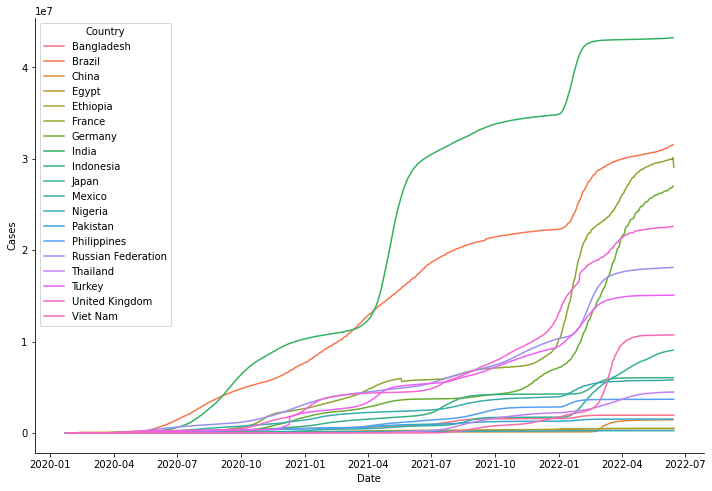

In [ ]:
covid_country = covid.groupby(['Country', 'Date'])['Cases'].sum().reset_index()

fig, ax = plt.subplots(figsize = (12,8))
sns.lineplot('Date', 'Cases', hue = 'Country', data = covid_country, ax = ax)
sns.despine()

### Twitter

In [ ]:
import yaml 
import requests
import json 
from datetime import datetime
from pathlib import Path


In [ ]:
with open(Path("config.yaml"), 'r') as f: 
  config = yaml.safe_load(f)

bearer_token = config['token']
all_url = "https://api.twitter.com/2/tweets/search/all"
recent_url = "https://api.twitter.com/2/tweets/search/recent"

def create_headers(bearer_token):
  headers = {"Authorization": "Bearer {}".format(bearer_token)}
  return headers

def connect_to_endpoint(url, headers, params, encoding = "ISO-8859-1"):
  response = requests.request("GET", url, headers=headers, params=params)
  if response.status_code != 200:
      raise Exception(response.status_code, response.text)
  return response.json()

In [ ]:
import datetime
from dateutil.relativedelta import relativedelta

end = datetime.datetime.now(datetime.timezone.utc) - relativedelta(days = 1)
begin = end - relativedelta(days = 5)

In [ ]:
max_count = 10
from_date = begin.isoformat()
to_date = end.isoformat()
filters = "World Cup"

params = {
    "query": fr"(\{filters}) (lang:en)",
    "tweet.fields": "created_at,lang,author_id,public_metrics",
}

if max_count:
    params['max_results'] = str(max_count)
if from_date:
    params["start_time"] = from_date
if to_date:
    params["end_time"] = to_date

headers = create_headers(bearer_token)
json_response = connect_to_endpoint(recent_url, headers, params)

for d in json_response['data']:
    d['reply_count'] = d['public_metrics']['reply_count']
    d['like_count'] = d['public_metrics']['like_count']
    d['quote_count'] = d['public_metrics']['quote_count']
    d['retweet_count'] = d['public_metrics']['retweet_count']
    d.pop('public_metrics', 'None')

df = pd.DataFrame(json_response['data'])

In [ ]:
df.head()

,author_id,text,lang,id,created_at,reply_count,like_count,quote_count,retweet_count
0,618491598,Thank you for 2 of the greatest summers in liv...,en,1536809264441872388,2022-06-14T20:34:15.000Z,0,0,0,0
1,262849414,End of season friendlies (which is what they s...,en,1536809264043417607,2022-06-14T20:34:15.000Z,0,0,0,0
2,378168073,@Lawton_Times Shut up you arse licker. If he d...,en,1536809264022429697,2022-06-14T20:34:15.000Z,0,0,0,0
3,1101597193696354304,@mxddylfc Nah he'll be manager at the world cu...,en,1536809262785101833,2022-06-14T20:34:15.000Z,0,0,0,0
4,3176970966,Prior to tonite I felt #southgate had to go AF...,en,1536809262483120129,2022-06-14T20:34:15.000Z,1,1,0,0


In [ ]:
import re

def cleaning_tweets(text):
    whitespace = re.compile(r"\s+")
    user = re.compile(r"(?i)@[a-z0-9_]+")
    user_reddit = re.compile(r"(?i)u/[a-z0-9_]+")

    text = whitespace.sub(" ", text)
    text = user.sub("", text)
    text = user_reddit.sub("", text)
    text = text.replace("\n", " ")
    # text = re.sub('\[.*?\]', '', text)
    # text = re.sub('<.*?>+', '', text)
    text = re.sub(r"https?\S+", "", text)
    text = re.sub(r"&.*?;", "", text)
    text = re.sub(r"<.*?>", "", text)
    # text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = text.replace("RT", "")
    text = text.replace(u"…", "")
    text = text.strip()
    return text


df['text'] = df['text'].apply(cleaning_tweets)

In [ ]:
df.head()

#### Análise de Sentimentos

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 12.9 MB/s 
     |████████████████████████████████| 6.6 MB 48.3 MB/s 
     |████████████████████████████████| 86 kB 6.9 MB/s 
     |████████████████████████████████| 596 kB 78.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip install sentencepiece


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 11.3 MB/s 


In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import MarianTokenizer, MarianMTModel
from scipy.special import softmax

In [ ]:
task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"
sent_tokenizer = AutoTokenizer.from_pretrained(MODEL)
sent_model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

In [ ]:
text_to_predict = df['text'].ravel().tolist()

In [ ]:
text_to_predict

In [ ]:
encoded_input = sent_tokenizer(text_to_predict, return_tensors='pt', padding = True)
output = sent_model(**encoded_input)
scores = output[0].detach().numpy()
scores = softmax(scores, axis = 1)
df[['Negative', "Neutral", "Positive"]] = scores

In [ ]:
df[['text', 'Negative', "Neutral", "Positive"]].head(10)